In [1]:
!pip freeze | grep "qiskit"

qiskit==0.44.0
qiskit-aer==0.12.0
qiskit-algorithms==0.3.1
qiskit-ibmq-provider==0.20.2
qiskit-ignis==0.7.1
qiskit-machine-learning==0.7.2
qiskit-nature==0.6.2
qiskit-terra==0.25.0


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler
from time import time
import numpy as np

/var/folders/mt/y75db3512zv_8r60rn4pb82h0000gn/T/ipykernel_82294/1877174990.py:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


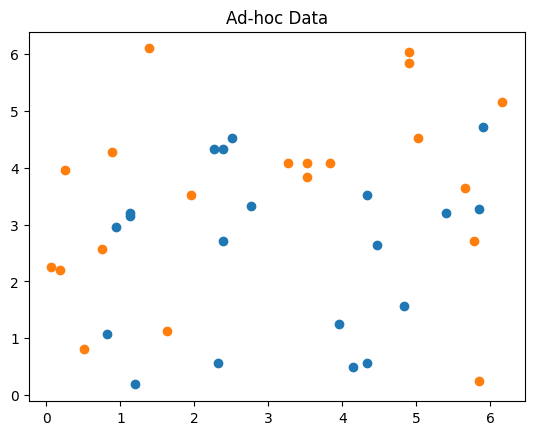

[[5.84336234 0.62831853]
 [6.09468975 3.83274304]
 [5.65486678 1.44513262]
 [2.26194671 3.01592895]
 [6.09468975 1.50796447]
 [1.00530965 6.22035345]
 [2.45044227 1.19380521]
 [2.45044227 1.44513262]
 [5.46637122 4.1469023 ]
 [2.45044227 1.44513262]
 [5.02654825 2.70176968]
 [4.33539786 5.27787566]
 [5.40353936 1.75929189]
 [2.82743339 4.46106157]
 [0.37699112 6.1575216 ]
 [0.81681409 3.76991118]
 [3.76991118 4.33539786]
 [2.76460154 0.56548668]
 [5.15221195 2.89026524]
 [0.12566371 5.34070751]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
20


In [3]:
feature_dim = 2
train_data, train_labels, test_data, test_labels = ad_hoc_data(
    training_size=20, test_size=10, n=feature_dim, gap=0.3, plot_data=True
)

print(test_data)
print(test_labels)
print(len(test_data))

In [4]:
sampler = Sampler()

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1)
ansatz = TwoLocal(feature_dim, ["ry", "rz"], "cz", reps=1)
vqc = VQC(
    feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=1), sampler=sampler
)

start_time = time()
vqc.fit(train_data, train_labels)
end_time = time()
duration = end_time - start_time
print("training time for VQC : ", duration)

training time for VQC :  0.052500009536743164


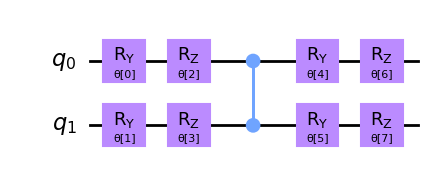

In [5]:
ansatz.decompose().draw(output="mpl")

In [6]:
result = vqc.predict(test_data)
result2 = np.delete(result, 1, 1)
test_labels2 = np.delete(test_labels, 1, 1)
print(classification_report(test_labels, result))
print(confusion_matrix(test_labels2, result2))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.40      0.40      0.40        10

   micro avg       0.40      0.40      0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.40      0.40      0.40        20
 samples avg       0.40      0.40      0.40        20

[[4 6]
 [6 4]]


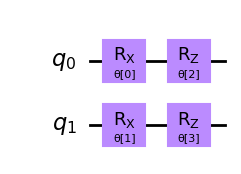

In [7]:
ansatz_circuit1 = TwoLocal(
    feature_dim, ["rx", "rz"], reps=1, skip_final_rotation_layer=True
)
ansatz_circuit1.decompose().draw(output="mpl")

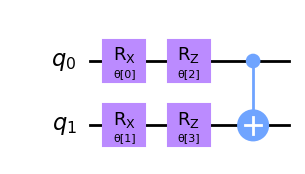

In [8]:
ansatz_circuit2 = TwoLocal(
    feature_dim,
    ["rx", "rz"],
    "cx",
    entanglement="linear",
    reps=1,
    skip_final_rotation_layer=True,
)
ansatz_circuit2.decompose().draw(output="mpl")

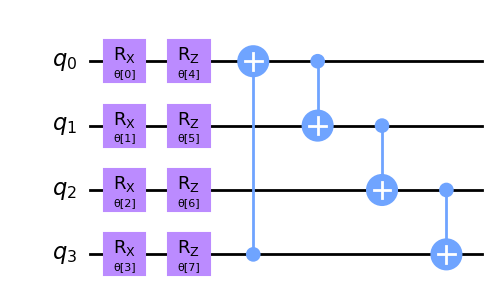

In [9]:
ansatz_circuit3 = TwoLocal(
    4,
    ["rx", "rz"],
    "cx",
    entanglement="circular",
    reps=1,
    skip_final_rotation_layer=True,
)
ansatz_circuit3.decompose().draw(output="mpl")

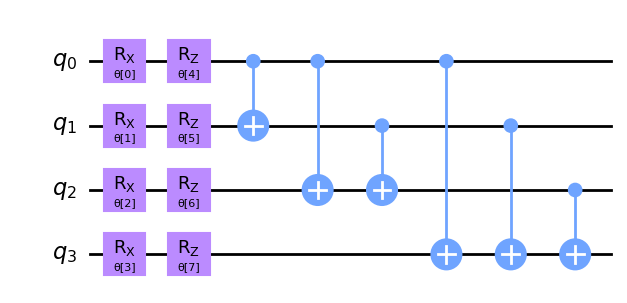

In [10]:
ansatz_circuit3 = TwoLocal(
    4, ["rx", "rz"], "cx", entanglement="full", reps=1, skip_final_rotation_layer=True
)
ansatz_circuit3.decompose().draw(output="mpl")

This notebook was contributed to by a student